In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import stats
import numpy as np

In [21]:
data = pd.read_csv("train.csv")

In [22]:
print(data.shape)
data.head()

(101763, 23)


,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [24]:
data.drop("id", axis=1, inplace=True)

In [25]:
for column in data.columns:
    if column != "defects":
        data[column] = stats.zscore(data[column])

In [26]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-0.281083,-0.315497,-0.398386,-0.270814,-0.214179,-0.204323,-0.515843,0.416261,-0.582895,-0.080835,...,-0.150553,-0.131124,-0.466893,-0.19682,0.608024,-0.365180,-0.187762,-0.240609,-0.335784,False
1,-0.427603,-0.442066,-0.398386,-0.270814,-0.377782,-0.304545,0.283395,-0.473180,-0.282763,-0.104512,...,-0.306233,-0.300547,-0.466893,-0.19682,-0.132770,-0.254463,-0.379082,-0.352197,-0.474550,False
2,-0.482548,-0.442066,-0.398386,-0.270814,-0.301824,-0.268048,-0.016319,-0.398824,-0.210574,-0.100223,...,-0.384072,-0.300547,-0.466893,-0.19682,0.015389,-0.254463,-0.283422,-0.310351,-0.474550,False
3,-0.537492,-0.568635,-0.398386,-0.451499,-0.430368,-0.349603,0.782918,-0.597106,-0.424954,-0.106942,...,-0.487858,-0.300547,-0.310211,-0.19682,-0.577246,-0.531254,-0.398214,-0.449837,-0.613317,True
4,-0.482548,-0.442066,-0.398386,-0.270814,-0.465426,-0.375627,0.683014,-0.570197,-0.662084,-0.107508,...,-0.410019,-0.300547,-0.310211,-0.19682,-0.725405,-0.531254,-0.455609,-0.407991,-0.474550,False


In [27]:
data.var()

loc                  1.000010
v(g)                 1.000010
ev(g)                1.000010
iv(g)                1.000010
n                    1.000010
v                    1.000010
l                    1.000010
d                    1.000010
i                    1.000010
e                    1.000010
b                    1.000010
t                    1.000010
lOCode               1.000010
lOComment            1.000010
lOBlank              1.000010
locCodeAndComment    1.000010
uniq_Op              1.000010
uniq_Opnd            1.000010
total_Op             1.000010
total_Opnd           1.000010
branchCount          1.000010
defects              0.175278
dtype: float64

In [28]:
interfeature_corr_matrix = data.drop("defects", axis=1).corr().abs() > .95

<Axes: >

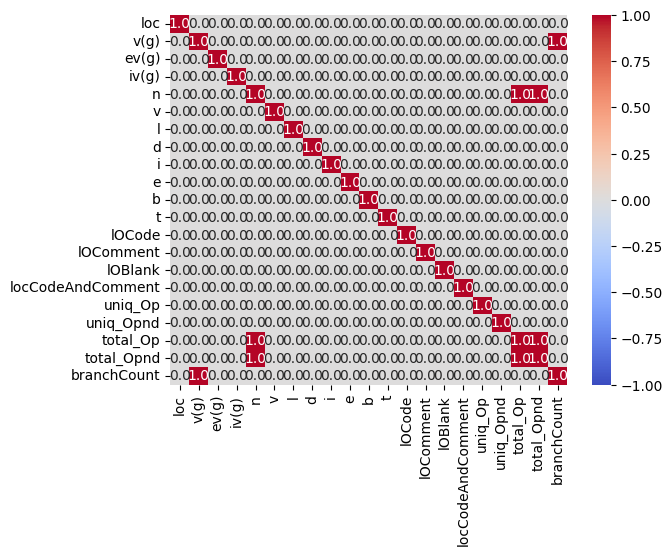

In [29]:
sns.heatmap(interfeature_corr_matrix, cmap="coolwarm", annot=True, fmt="0.001f", vmin=-1, vmax=1)

In [30]:
data.drop(["v(g)", "total_Op", "total_Opnd"], axis=1, inplace=True) 

In [31]:
defects_corr_matrix = data.corr()["defects"]
defects_corr_matrix.abs()

loc                  0.342642
ev(g)                0.259928
iv(g)                0.245618
n                    0.258080
v                    0.231179
l                    0.253237
d                    0.241936
i                    0.208577
e                    0.095366
b                    0.232594
t                    0.099592
lOCode               0.250604
lOComment            0.205402
lOBlank              0.257819
locCodeAndComment    0.133150
uniq_Op              0.178474
uniq_Opnd            0.246113
branchCount          0.322827
defects              1.000000
Name: defects, dtype: float64

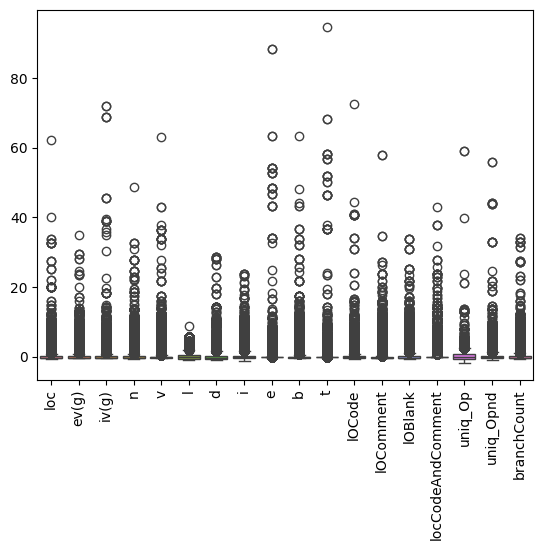

In [32]:
sns.boxplot(data=data.drop("defects", axis=1))
plt.xticks(rotation=90)
plt.show()

In [33]:
outliers = data.loc[(data.e > 70) | (data["iv(g)"] > 65) 
| (data.t > 70) | (data.lOComment > 50) 
| (data.uniq_Op > 35) | (data.uniq_Opnd > 50) 
| (data["loc"] > 50) | (data.v > 50)
| (data.b > 50)].index
data.drop(outliers, axis=0, inplace=True)

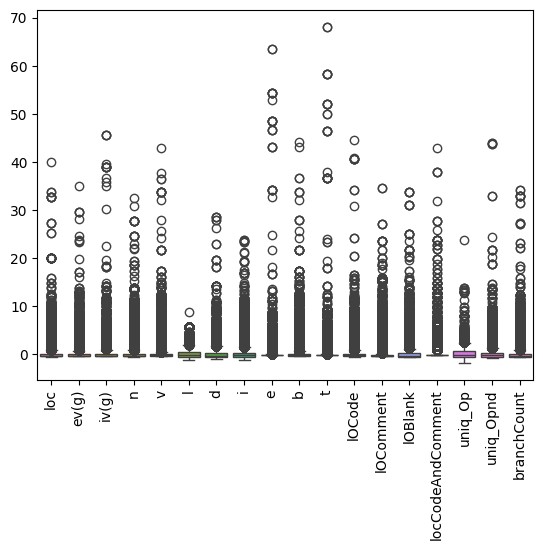

In [34]:
sns.boxplot(data=data.drop("defects", axis=1))
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='defects'>

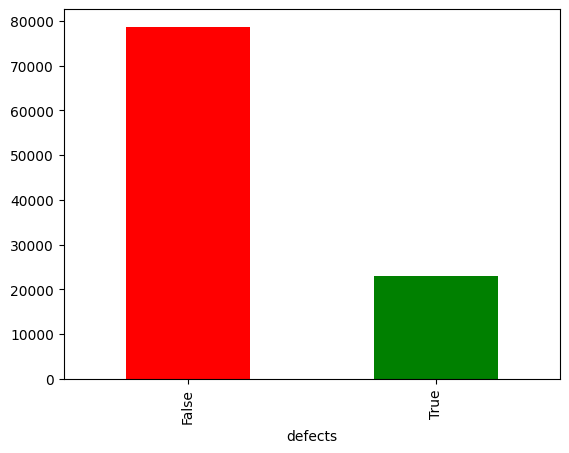

In [35]:
data.defects.value_counts().plot(kind="bar", color=["red", "green"])

In [36]:
data = pd.concat([data, data[data.defects == True].sample(frac=2.4, replace=True)], axis=0)
data = data.sample(frac=1, axis=0)
#data.drop(data[data.defects == False].sample(n=53000).index, axis=0, inplace=True)

<Axes: xlabel='defects'>

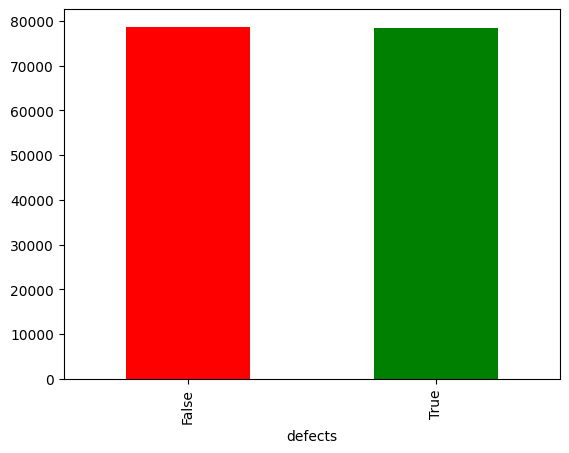

In [37]:
data.defects.value_counts().plot(kind="bar", color=["red", "green"])

In [38]:
data_csv = data.to_csv("cleaned_data.csv", index=False)